# Numpy

In [1]:
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt

**Exercise 1**

In [2]:
def p(x,coef):
    '''calculates the sum of a polinomial given a value for x and a list of coefficients'''
    X = np.ones_like(coef)  # np.ones_like takes the list directlly, instead of a scalar, result equals np.ones(len(coef))
    X[1:] = x
    y = np.cumprod(X)
    return coef @ y

In [3]:
# test

coef = [2,3,4]
x = 2

print(p(x,coef))

q = np.poly1d(np.flip(coef))
print(q(x))

24
24


**Exercise 2**

In [4]:
class discreteRV:
    """ Generates an array of draws from a discrete random variable with vector of
    probabilities given by q. """
    
    def __init__(self,q):
        """ The argument q is a nonnegative NumPy array, or array like, that sums to 1 """
        
        self.q = q
        self.Q = np.cumsum(self.q)

    def draw(self,k = 1):
        """ Returns k draws from q. For each such draw, the value i is returned
        with probability q[i]."""
        
        U = uniform(0, 1, size = k)
        return self.Q.searchsorted(U)

In [5]:
# teste

pascal = discreteRV([0.25,0.5,0.25])
uni = discreteRV([1/10 for n in range(10)])

print(pascal.draw())
print(pascal.draw(5))

print(20*'-')

print(uni.draw())
print(uni.draw(8))

[1]
[2 1 1 2 0]
--------------------
[5]
[6 1 6 6 3 7 5 7]


**Exercise 3**

In [6]:
class ECDF:
    
    def __init__(self,samples):
        self.samples = np.asarray(samples)
        
    def __call__(self,x):
        return np.mean(self.samples <= x) # mean of boleans
    
    def plot(self,a=None,b=None):
        if a is None:
            a = self.samples.min()
        if b is None:
            b = self.samples.max()
        
        x_vals = np.linspace(a,b,100)
        f = np.vectorize(self.__call__)
        plt.plot(x_vals,f(x_vals))
        plt.show()

0.473


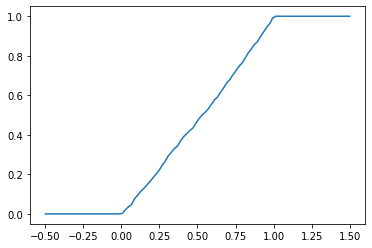

In [7]:
X = [uniform(0, 1) for i in range(1000)]
F = ECDF(X)

print(F(0.5))
F.plot(-.5,1.5)

0.681


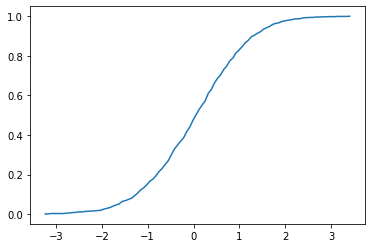

In [8]:
X = np.random.randn(1000)
F = ECDF(X)

print(F(0.5))
F.plot()

# Matplotlib

**Exercise 1**

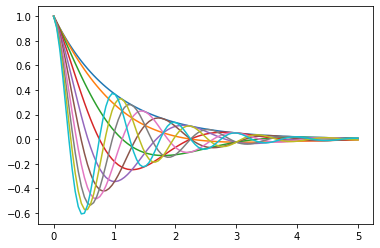

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def f(θ, x):
    return np.cos(np.pi*θ*x) * np.exp(-x)

θs = np.linspace(0, 2, 10)
x = np.linspace(0,5,100)
fig,ax = plt.subplots()

for θ in θs:
    ax.plot(x,f(θ,x))

plt.show()

# SciPy

**Exercise 1**

In [10]:
def bisect_recursive(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    middle = 0.5 * (a + b)
    if b - a < tol:    
        return middle
    else:
        # === if root is between lower and middle === #
        if f(middle) > 0:
            return bisect_recursive(f,a,middle,tol)
        # === if root is between middle and upper  === #
        else:              
            return bisect_recursive(f,middle,b,tol)

In [11]:
from scipy import optimize

f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

print(bisect_recursive(f,0,1))
print(optimize.bisect(f,0,1))

0.408294677734375
0.4082935042806639


In [12]:
%timeit bisect_recursive(f,0,1)

52.5 µs ± 1.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
%timeit optimize.bisect(f,0,1)

131 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Other Scientific Libraries

**Exercise 1**

In [14]:
# Pure Python:

from random import uniform

def MC_python(state,p_hh,p_ll,n):
    seq = [state]
    for i in range(n):
        U = uniform(0,1)
        if state == 1:    # high state == 1
            if U > p_hh:
                state = 0
        else:
            if U > p_ll:
                state = 1
        seq.append(state)
    return seq

In [15]:
n = 100_000
x = MC_python(1,0.8,0.9,n)
print(1-sum(x)/len(x))  # Fraction of time x is in state 0 (low)

0.6672533274667254


In [16]:
# Using numpy:

import numpy as np

def MC_numpy(state,p_hh,p_ll,n):  
    U = np.random.uniform(0,1,n)
    seq = np.empty(n)
    seq[0] = state
    for i in range(1,n):
        if seq[i-1] == 1: 
            seq[i] = U[i-1] < p_hh    # high state == 1
        else:
            seq[i] = U[i-1] > p_ll
    return seq

In [17]:
n = 100_000
x = MC_numpy(1,0.8,0.9,n)
print(np.mean(x == 0))  # Fraction of time x is in state 0

0.66878


In [18]:
# numba version:

from numba import jit

MC_numba = jit(MC_numpy)

In [19]:
n = 100_000
x = MC_numba(1,0.8,0.9,n)
print(np.mean(x == 0))  # Fraction of time x is in state 0

0.66605


In [20]:
# comparando os resultados:

import quantecon as qe

p_hh = 0.8
p_ll = 0.9
state = 1
n = 100_000

# pure python

qe.util.tic()
MC_python(state,p_hh,p_ll,n)
t_py = qe.util.toc()

#  w/ numpy

qe.util.tic()
MC_numpy(state,p_hh,p_ll,n)
t_np = qe.util.toc()

# numba

qe.util.tic()
MC_numba(state,p_hh,p_ll,n)
t_nu = qe.util.toc()

print(50*'-')
print('numpy' + ' ' + f'{round(100*t_np/t_py,4)} % of pure python')
print('numba' + ' ' + f'{round(100*t_nu/t_py,4)} % of pure python')

# se rodarmos esse código diversas vezes veremos que os percentuais variam bastante

TOC: Elapsed: 0:00:0.06
TOC: Elapsed: 0:00:0.12
TOC: Elapsed: 0:00:0.00
--------------------------------------------------
numpy 203.8884 % of pure python
numba 3.2262 % of pure python


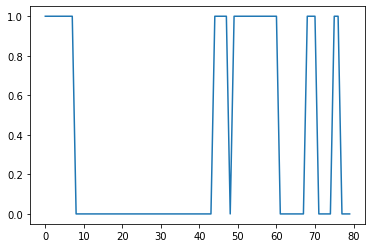

In [21]:
# adding a visualization of the Markov chain 

import matplotlib.pyplot as plt

n = 80
x = MC_numba(1,0.8,0.9,n)
fig,ax = plt.subplots()
ax.plot(range(n),x)
plt.show()